In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('marketing_data.csv')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [4]:
def cleanincome(x):
    if isinstance(x, str):
        return float(x[1:].replace(",",''))

In [5]:
df[' Income '] = df[' Income '].map(lambda x: cleanincome(x))

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
q95 = df['MntWines'].quantile(0.95)
q01 = df['MntWines'].quantile(0.01)
greater_q99_cond = (df['MntWines']>q95)
lower_q01_cond = (df['MntWines']<q01)

In [9]:
df = df[~(greater_q99_cond|lower_q01_cond)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2116 non-null   int64  
 1   Year_Birth           2116 non-null   int64  
 2   Education            2116 non-null   object 
 3   Marital_Status       2116 non-null   object 
 4    Income              2092 non-null   float64
 5   Kidhome              2116 non-null   int64  
 6   Teenhome             2116 non-null   int64  
 7   Dt_Customer          2116 non-null   object 
 8   Recency              2116 non-null   int64  
 9   MntWines             2116 non-null   int64  
 10  MntFruits            2116 non-null   int64  
 11  MntMeatProducts      2116 non-null   int64  
 12  MntFishProducts      2116 non-null   int64  
 13  MntSweetProducts     2116 non-null   int64  
 14  MntGoldProds         2116 non-null   int64  
 15  NumDealsPurchases    2116 non-null   int64 

In [11]:
df = df.fillna(0)

<Axes: title={'center': 'MntWines'}, xlabel='Education'>

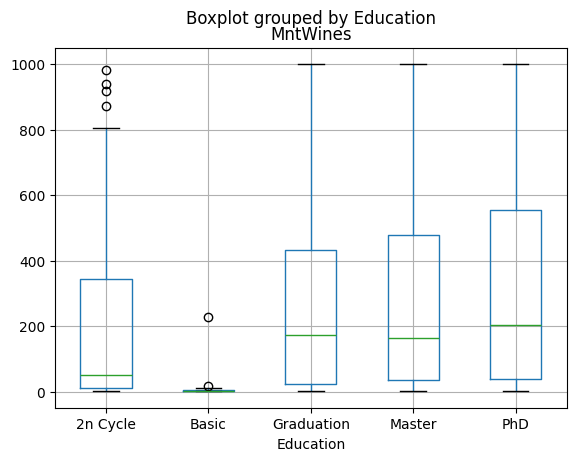

In [12]:
df.boxplot(by='Education', column='MntWines')

In [13]:
grad = df[df['Education'] == 'Graduation']['MntWines'].sample(n = 200)

In [14]:
grad = grad.reset_index(drop=True)

In [15]:
grad.mean()
print(grad)

0      244
1      296
2      229
3        2
4       95
      ... 
195     43
196    215
197    458
198    460
199    135
Name: MntWines, Length: 200, dtype: int64


In [16]:
phd = df[df['Education'] == 'PhD']['MntWines'].sample(n = 200)

In [17]:
phd = phd.reset_index(drop=True)

In [18]:
phd.mean()

np.float64(295.685)

In [19]:
master = df[df['Education'] == 'Master']['MntWines'].sample(n = 200)

In [20]:
master = master.reset_index(drop=True)

In [21]:
master.mean()


np.float64(268.12)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_25904\2556599123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grad)


<Axes: xlabel='MntWines', ylabel='Density'>

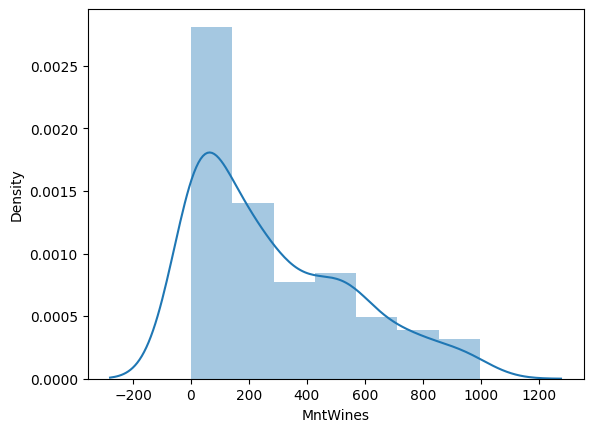

In [22]:
sns.distplot(grad)

In [23]:
stats.normaltest(grad)


NormaltestResult(statistic=np.float64(20.347966303023735), pvalue=np.float64(3.815006289879388e-05))

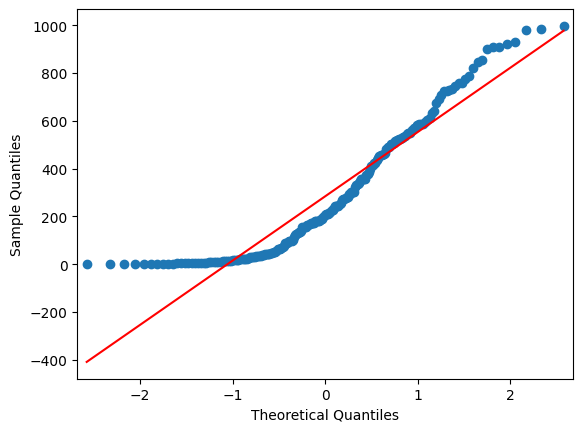

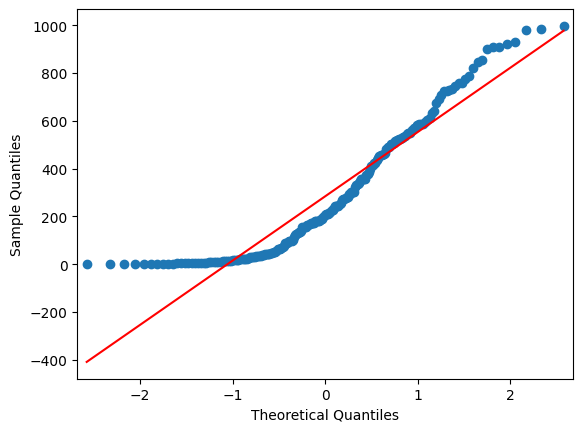

In [24]:
sm.qqplot(grad, line="s")

In [25]:
# Now we do the Bootstrapping method on sample to test that if the sample follow CLT or not
grad_sample = []
for i in range(500):
    grad = df[df['Education'] == 'Graduation']['MntWines'].sample(n = 200)
    grad_sample_mean = grad.mean()
    grad_sample.append(grad_sample_mean)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_25904\1575796857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grad_sample, bins=20)


<Axes: ylabel='Density'>

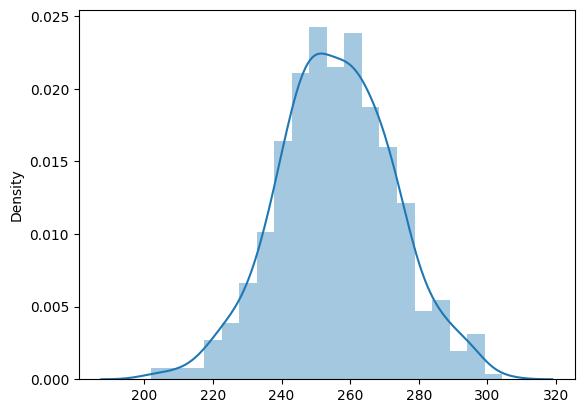

In [26]:
sns.distplot(grad_sample, bins=20)

In [27]:
stats.normaltest(grad_sample)


NormaltestResult(statistic=np.float64(0.23093598379028962), pvalue=np.float64(0.8909490893725592))

In [28]:
np.mean(grad_sample)

np.float64(255.87007)

In [29]:
# Take samples and reset index
grad_sampled = df[df['Education'] == 'Graduation']['MntWines'].sample(n=200).reset_index(drop=True)
phd_sampled = df[df['Education'] == 'PhD']['MntWines'].sample(n=200).reset_index(drop=True)
master_sampled = df[df['Education'] == 'Master']['MntWines'].sample(n=200).reset_index(drop=True)
d = {'Grad':grad_sampled, 'Phd':phd_sampled, 'Master':master_sampled}

In [30]:
dataset = pd.DataFrame(d)


In [31]:
dataset

,Grad,Phd,Master
0,623,867,248
1,507,2,960
2,28,70,962
3,595,881,295
4,478,345,113
...,...,...,...
195,69,896,508
196,6,27,167
197,18,606,629
198,45,462,30


In [32]:
f, pval = stats.f_oneway(dataset["Grad"], dataset["Phd"], dataset["Master"])

In [33]:
pval

np.float64(0.11046979853286727)

In [34]:
# Skewness
stats.skew(grad_sampled)

np.float64(0.8540762128788149)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_25904\4186447215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grad_sampled)


<Axes: xlabel='MntWines', ylabel='Density'>

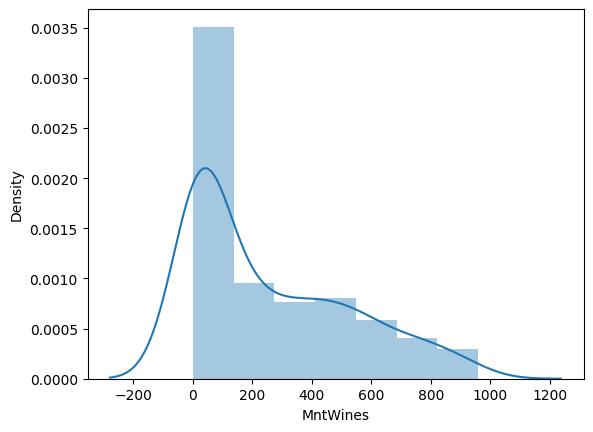

In [35]:
sns.distplot(grad_sampled)

In [36]:
# removing outliers before creating the scatter plot
df2 = df[~(df[' Income ']>120000)]

<Axes: xlabel=' Income ', ylabel='MntWines'>

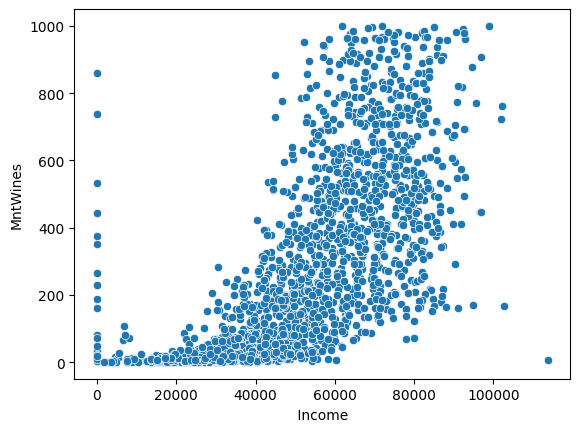

In [37]:
sns.scatterplot(x=' Income ', y='MntWines', data=df2)

In [38]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [39]:
cols = [' Income ',
       'Kidhome', 'Teenhome',  'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [40]:
df3 = df2[cols]

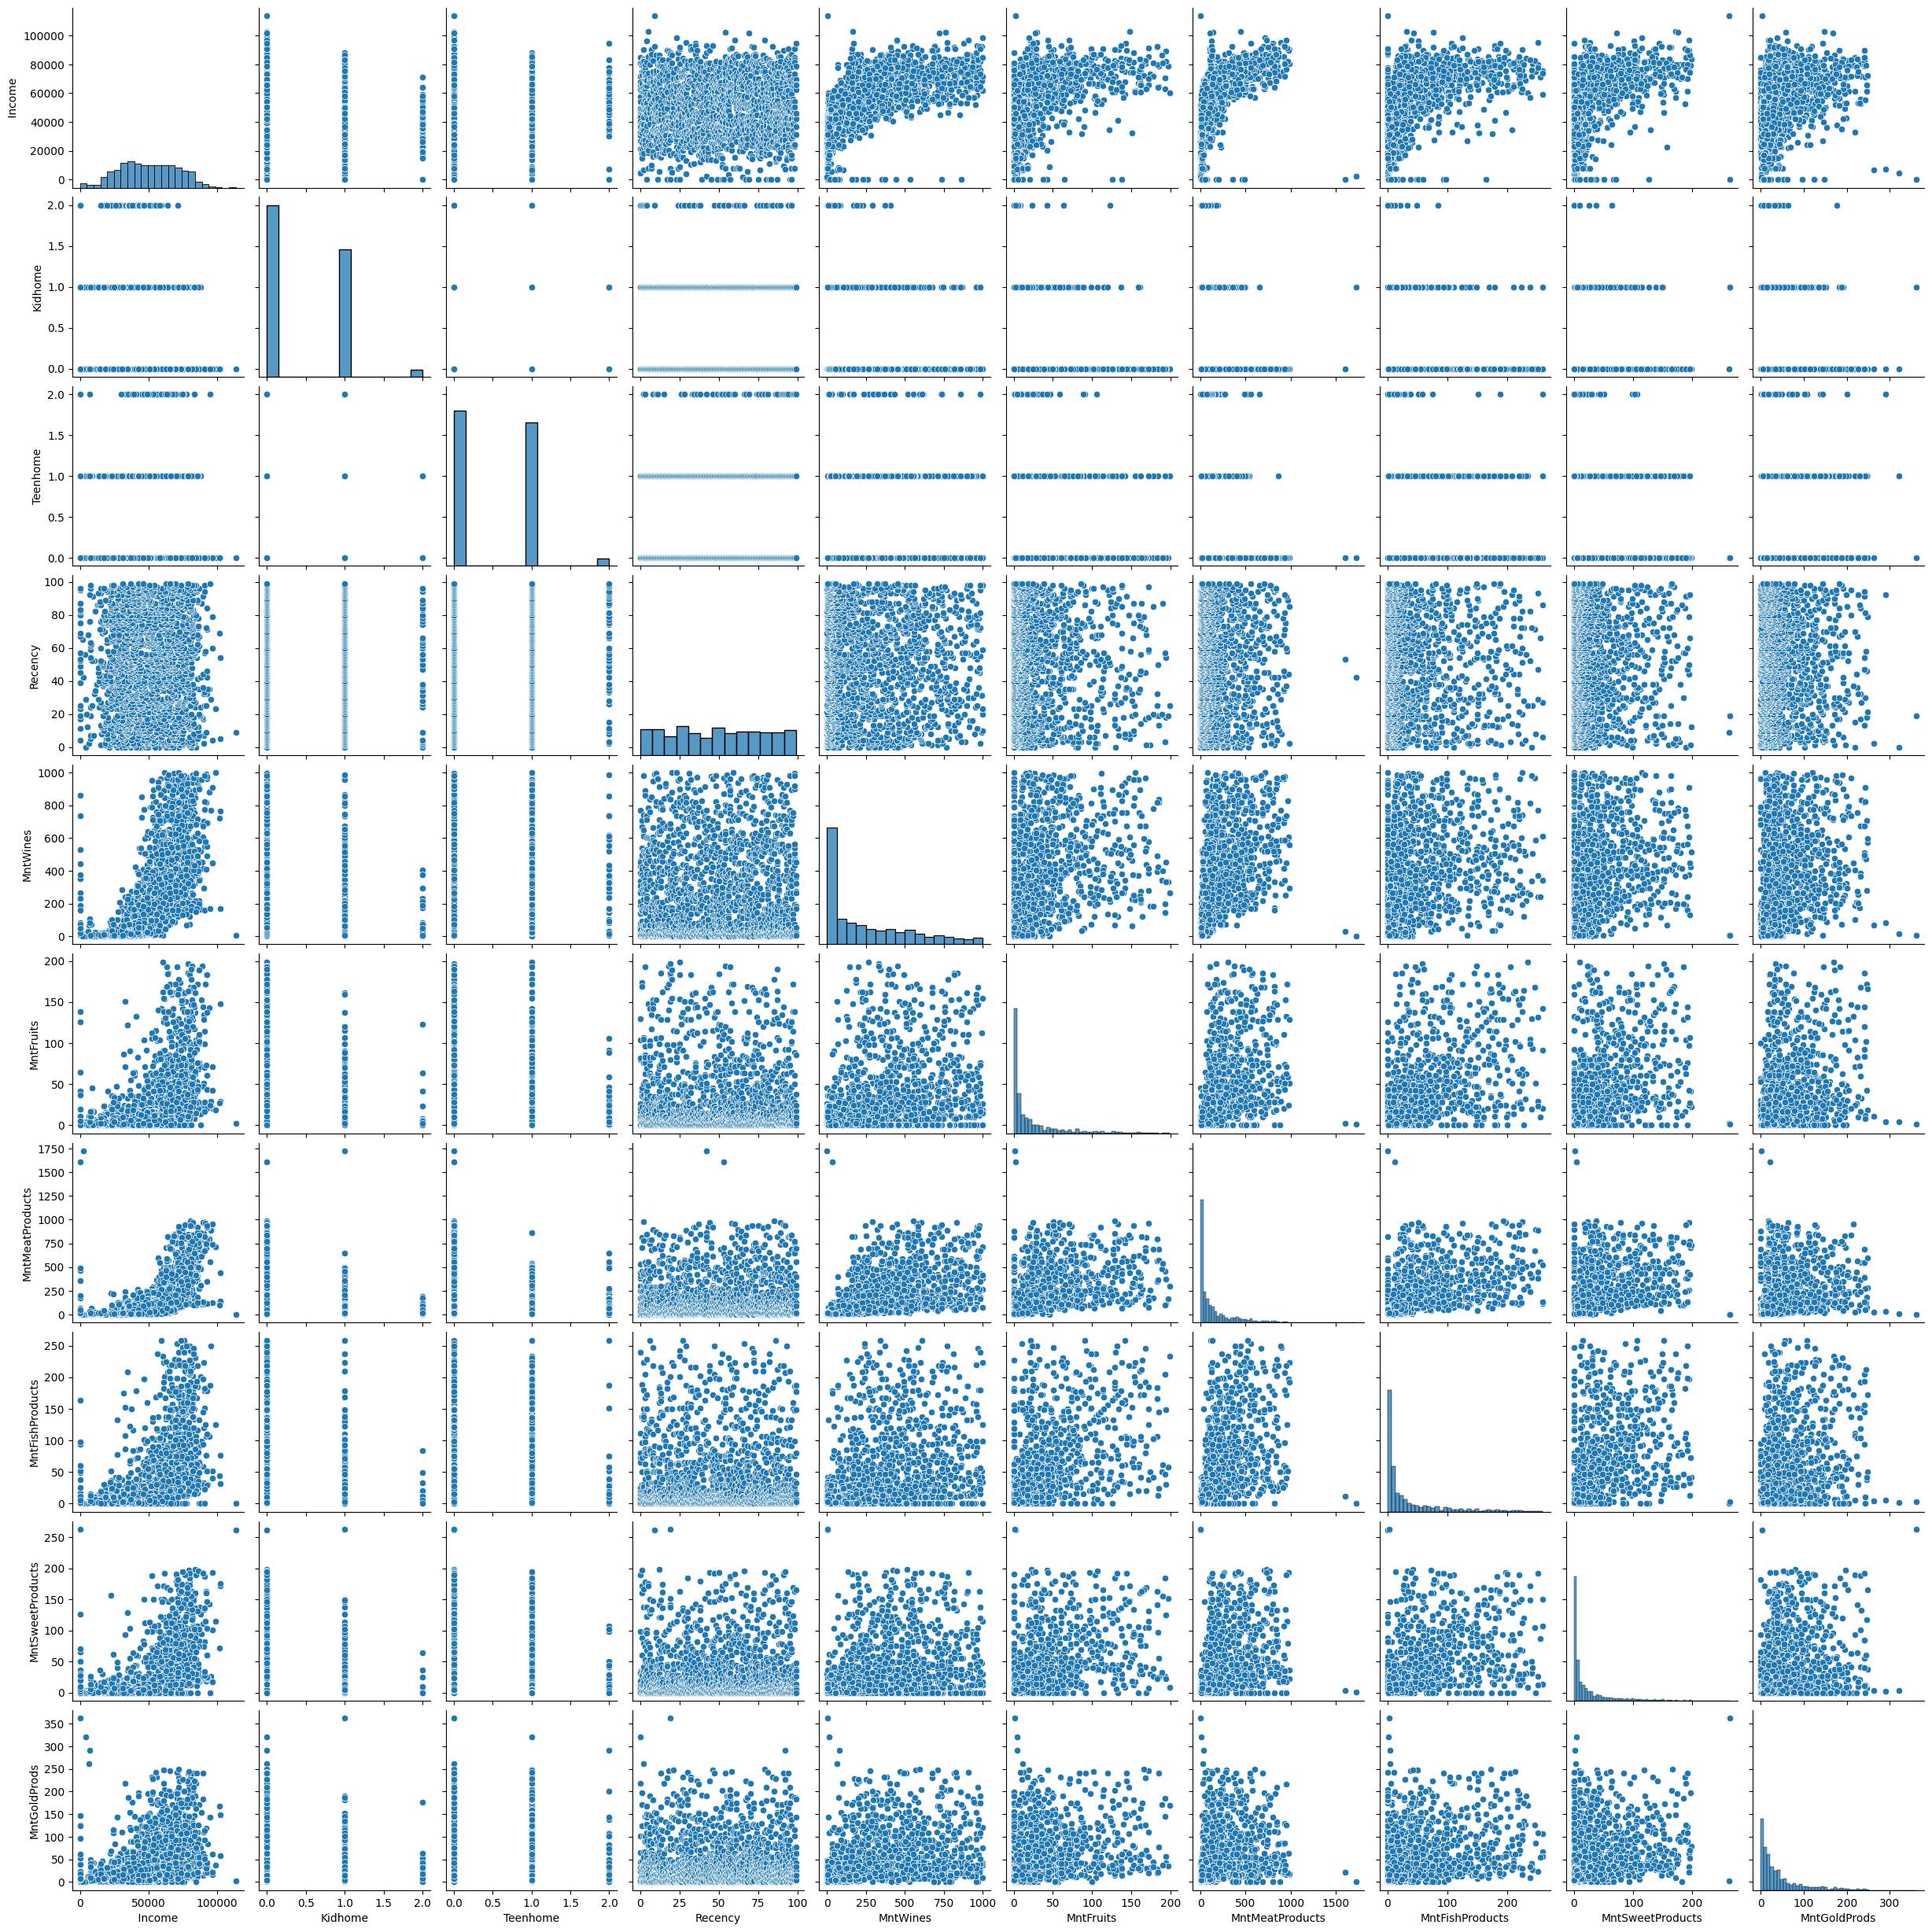

In [41]:
sns.pairplot(df3)

<Axes: >

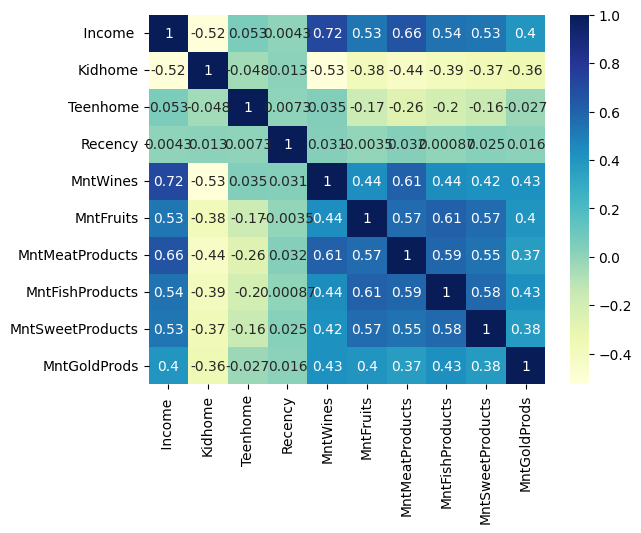

In [42]:
# sns.set(rc={'figure.'})
sns.heatmap(df3.corr(), cmap="YlGnBu", annot=True)

In [43]:
df3

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,84835.0,0,0,0,189,104,379,111,189,218
1,57091.0,0,0,0,464,5,64,7,0,37
2,67267.0,0,1,0,134,11,59,15,2,30
3,32474.0,1,1,0,10,0,1,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34
...,...,...,...,...,...,...,...,...,...,...
2235,66476.0,0,1,99,372,18,126,47,48,78
2236,31056.0,1,0,99,5,10,13,3,8,16
2237,46310.0,1,0,99,185,2,88,15,5,14
2238,65819.0,0,0,99,267,38,701,149,165,63


In [44]:
np.corrcoef(df2[' Income '], df2['MntWines'])

array([[1.        , 0.71919905],
       [0.71919905, 1.        ]])

In [45]:
np.cov(df2[' Income '], df2['MntWines'])

array([[4.31317648e+08, 4.13833347e+06],
       [4.13833347e+06, 7.67636348e+04]])

In [52]:
c,pval = stats.spearmanr(df2[' Income '], df2['MntWines'])

In [ ]:
# print("p value: ", pval)
print("statistic value: ", c)

p value:  0.0
statistic value:  0.8230235244042896
